In [11]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits as digits_load

In [12]:
# Készíts egy függvényt ami betölti a digits datasetet 
# NOTE: használd az sklearn load_digits-et
# Függvény neve: load_digits()
# Függvény visszatérési értéke: a load_digits visszatérési értéke
def load_digits():
    return digits_load()

In [13]:
# Vizsgáld meg a betöltött adatszetet (milyen elemek vannak benne stb.)
digits=load_digits()
print("Keys of dataset: {}".format(digits.keys()))
print("Data shape:", digits.data.shape)
print("Label shape:", digits.target.shape)
print("First row:", digits.data[0])
print("First row labels:", digits.target[0])

Keys of dataset: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Data shape: (1797, 64)
Label shape: (1797,)
First row: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
First row labels: 0


In [14]:
# Vizsgáld meg a data paraméterét a digits dataset-nek (tartalom,shape...)
data = digits.data
print("Details of dataset:")
print(data)
print("Shape:", data.shape)

Details of dataset:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
Shape: (1797, 64)


In [15]:
# Készíts egy függvényt ami létrehoz egy KMeans model-t 10 db cluster-el
# NOTE: használd az sklearn Kmeans model-jét (random_state legyen 0)
# Miután megvan a model predict-elj vele 
# NOTE: használd a fit_predict-et
# Függvény neve: predict(n_clusters:int,random_state:int,digits)
# Függvény visszatérési értéke: (model:sklearn.cluster.KMeans,clusters:np.ndarray)

def predict(n_clusters: int, random_state: int, digits) -> tuple:
    model = KMeans(n_clusters=n_clusters, random_state=random_state)
    clusters = model.fit_predict(digits.data)
    return model, clusters

In [16]:
# Vizsgáld meg a shape-jét a kapott model cluster_centers_ paraméterének.
model = KMeans(n_clusters=10, random_state=0).fit(digits.data)

print("Cluster center shapes:")
print(model.cluster_centers_.shape)

Cluster center shapes:
(10, 64)


C:\Users\PlacidoScardone\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


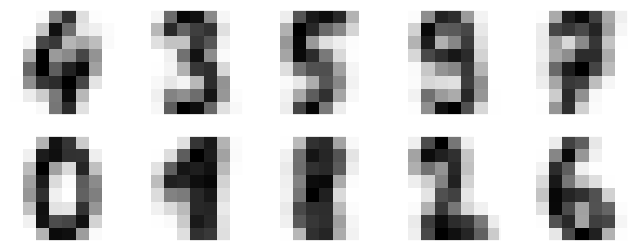

In [17]:
# Készíts egy plotot ami a cluster középpontokat megjeleníti
fig, axes = plt.subplots(2, 5, figsize=(8, 3))
centers = model.cluster_centers_.reshape(10, 8, 8)
for ax, center in zip(axes.flat, centers):
    ax.set(xticks=[], yticks=[])
    ax.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

plt.show()

In [18]:
# Készíts egy függvényt ami visszaadja a predictált cluster osztályokat
# NOTE: amit a predict-ből visszakaptunk "clusters" azok lesznek a predictált cluster osztályok
# HELP: amit a model predictált cluster osztályok még nem a labelek, hanem csak random cluster osztályok, 
#       Hogy label legyen belőlük:
#       1. készíts egy result array-t ami ugyan annyi elemű mint a predictált cluster array
#       2. menj végig mindegyik cluster osztályon (0,1....9)
#       3. készíts egy maszkot ami az adott cluster osztályba tartozó elemeket adja vissza
#       4. a digits.target-jét indexeld meg ezzel a maszkkal
#       5. számold ki ennel a subarray-nek a móduszát
#       6. a result array-ben tedd egyenlővé a módusszal azokat az indexeket ahol a maszk True 
#       Erre azért van szükség mert semmi nem biztosítja nekünk azt, hogy a "0" cluster a "0" label lesz, lehet, hogy az "5" label lenne az.

# Függvény neve: get_labels(clusters:np.ndarray, digits)
# Függvény visszatérési értéke: labels:np.ndarray
def get_labels(clusters:np.ndarray, digits):
    result = np.zeros_like(clusters)
    for i in range(10):
        mask = (clusters == i)
        subarray = digits.target[mask]
        mode = np.bincount(subarray).argmax()
        result[mask] = mode
    return result

In [19]:
# Készíts egy függvényt ami kiszámolja a model accuracy-jét
# Függvény neve: calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray)
# Függvény visszatérési értéke: accuracy:float
# NOTE: Kerekítsd 2 tizedes jegyre az accuracy-t
def calc_accuracy(target_labels: np.ndarray, predicted_labels: np.ndarray) -> float:
    return round(accuracy_score(target_labels, predicted_labels), 2)

In [20]:
# Készíts egy confusion mátrixot és plot-old seaborn segítségével
def plot_confusion_matrix(target_labels: np.ndarray, predicted_labels: np.ndarray):
    cm = confusion_matrix(target_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()